<font size='4' color='blue'>

<b>EXPECTED VALUE : </b>   
    
According to the law of large numbers, if we flip a coin a large number of times, the average result will be closer <br>
to the expected value of 0.5.<br>

In statistics and probability analysis, the expected value is calculated by multiplying each of the possible outcomes <br>
by the likelihood each outcome will occur and then summing all of those values.
    
</font>


In [512]:
import numpy as np
import pandas as pd
from collections import Counter as C
import matplotlib.pyplot as plt

In [515]:
#  The expected value of a die roll is 3.5 for a standard 6-sided  die 
#  (a die with each of the numbers 1 through 6 appearing on exactly one
#  face of the die

#  how to calculate expected value 
#  multiply all the distinct values of Random Variable by the probability of each such value and sum the pruduct

In [529]:
(.16667 * 1) + (.16667 * 2)  + (.16667 * 3) + (.16667 * 4) + (.16667 * 5) + (.16667 * 6)

3.50007

In [533]:
N = 10000
X = np.random.choice([1,2,3,4,5,6], N)
d = C(X)
sorted(d.items())

[(1, 1665), (2, 1684), (3, 1666), (4, 1626), (5, 1663), (6, 1696)]

In [534]:
dice = pd.DataFrame(X, columns =['RV'])
dice.index = dice.index + 1

In [536]:
dice.head()

,RV
1,5
2,2
3,6
4,5
5,3


In [524]:
d = {1 : 'N1', 2 : 'N2', 3: 'N3', 4 : 'N4', 5 : 'N5', 6 : 'N6'}
for i in range(1,7) :
    dice[d[i]] = dice['RV'].apply(lambda x: 1 if x==i else 0)
    dice['cS_N'+str(i)] = np.cumsum(dice['N'+str(i)])
    dice['EV'+str(i)] = dice['cS_N'+str(i)] / dice.index    

In [547]:
dice.tail()

,RV,N1,N2,N3,N4,N5,N6,cS_N1,cS_N2,cS_N3,cS_N4,cS_N5,cS_N6,EV1,EV2,EV3,EV4,EV5,EV6
9996,4,0,0,0,1,0,0,1665,1683,1664,1625,1663,1696,0.166567,0.168367,0.166467,0.162565,0.166367,0.169668
9997,3,0,0,1,0,0,0,1665,1683,1665,1625,1663,1696,0.166550,0.168351,0.166550,0.162549,0.166350,0.169651
9998,4,0,0,0,1,0,0,1665,1683,1665,1626,1663,1696,0.166533,0.168334,0.166533,0.162633,0.166333,0.169634
9999,2,0,1,0,0,0,0,1665,1684,1665,1626,1663,1696,0.166517,0.168417,0.166517,0.162616,0.166317,0.169617
10000,3,0,0,1,0,0,0,1665,1684,1666,1626,1663,1696,0.166500,0.168400,0.166600,0.162600,0.166300,0.169600


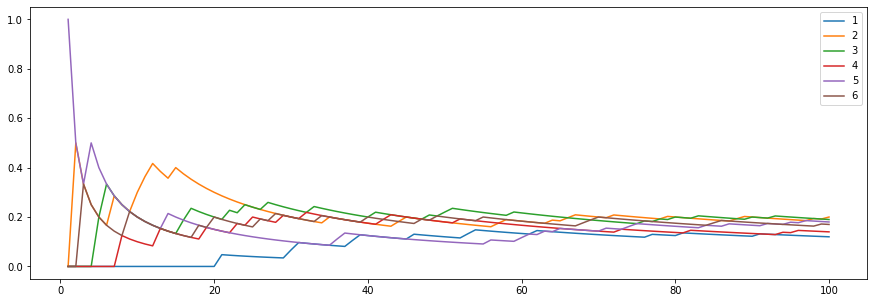

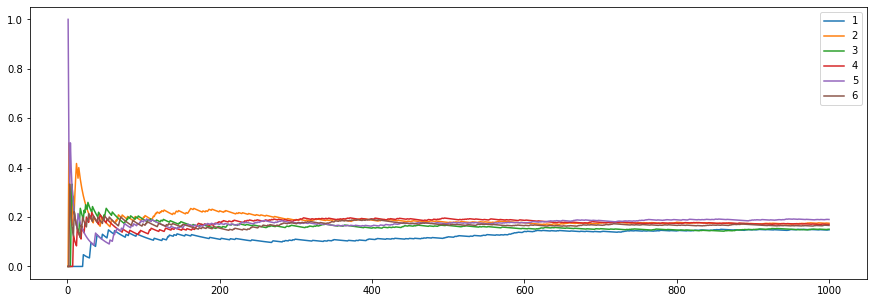

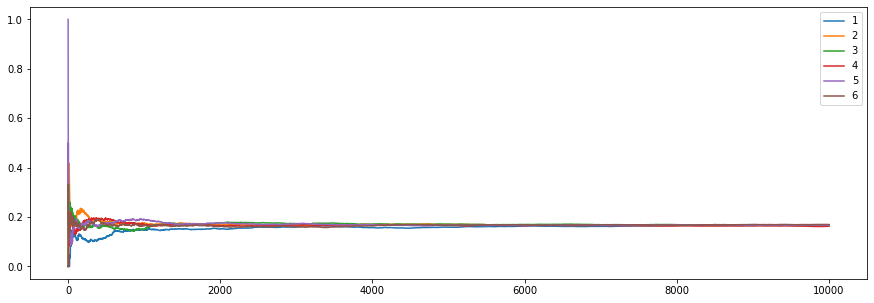

In [548]:
numbers = [1, 2, 3,4, 5, 6]
stop = [100, 1000, len(dice) ]
for s in stop :
    plt.figure(figsize=(15,5))
    for i in numbers :
        plt.plot(dice.loc[:s].index, dice.loc[:s, ['EV'+ str(i)]].values)
        #plt.plot(dice.loc[:s].index, dice.loc[:s, 'cS_N' + str(i)].values/dice.loc[:s].index)
    plt.legend(numbers)    
    plt.show()

In [428]:
EVs = []
for i in range(1,7) :
    EVs.append('EV'+str(i))

In [429]:
EVs

['EV1', 'EV2', 'EV3', 'EV4', 'EV5', 'EV6']

In [549]:
dice[EVs].tail()

,EV1,EV2,EV3,EV4,EV5,EV6
9996,0.166567,0.168367,0.166467,0.162565,0.166367,0.169668
9997,0.166550,0.168351,0.166550,0.162549,0.166350,0.169651
9998,0.166533,0.168334,0.166533,0.162633,0.166333,0.169634
9999,0.166517,0.168417,0.166517,0.162616,0.166317,0.169617
10000,0.166500,0.168400,0.166600,0.162600,0.166300,0.169600


In [558]:
#(.16667 * 1) + (.16667 * 2)  + (.16667 * 3) + (.16667 * 4) + (.16667 * 5) + (.16667 * 6)
s = 0
for i in range(len(EVs)) : 
    s = s + dice.loc[len(dice)][EVs[i]] * (i+1)
print(s)

3.5026


In [569]:
(.16667 * 1) + (.16667 * 2)  + (.16667 * 3) + (.16667 * 4) + (.16667 * 5) + (.16667 * 6)

3.50007

## Consolidated DataFrame and Chart for Expected Value #1 and #2

In [108]:
# common lines

N = 1000000
X = np.random.choice(['Heads', 'Tails'], N )
df = pd.DataFrame(X, columns=['RV'])

# lines for Game 1

Game1Fee = 0
Game1Heads = 10
Game1Tails = -8

df['Game1'] = np.where(df['RV']=='Heads', Game1Heads, Game1Tails)
df['Game1Fee'] = Game1Fee
df['Game1NetGain'] = df.Game1 - df.Game1Fee
df['Game1CumGain'] = np.cumsum(df.Game1NetGain)
df['Game1EV'] = df.Game1CumGain/(df.index+1)

# lines for Game 2

Game2Fee = 6
Game2Heads = 10
Game2Tails = 0

df['Game2'] = np.where(df['RV']=='Heads', Game2Heads, Game2Tails)
df['Game2Fee'] = Game2Fee
df['Game2NetGain'] = df.Game2 - df.Game2Fee
df['Game2CumGain'] = np.cumsum(df.Game2NetGain)
df['Game2EV'] = df.Game2CumGain/(df.index+1)

In [109]:
df.index = df.index+1

In [111]:
df.tail()

,RV,Game1,Game1Fee,Game1NetGain,Game1CumGain,Game1EV,Game2,Game2Fee,Game2NetGain,Game2CumGain,Game2EV
999996,Tails,-8,0,-8,1004064,1.004068,0,6,-6,-997736,-0.997740
999997,Tails,-8,0,-8,1004056,1.004059,0,6,-6,-997742,-0.997745
999998,Heads,10,0,10,1004066,1.004068,10,6,4,-997738,-0.997740
999999,Tails,-8,0,-8,1004058,1.004059,0,6,-6,-997744,-0.997745
1000000,Heads,10,0,10,1004068,1.004068,10,6,4,-997740,-0.997740


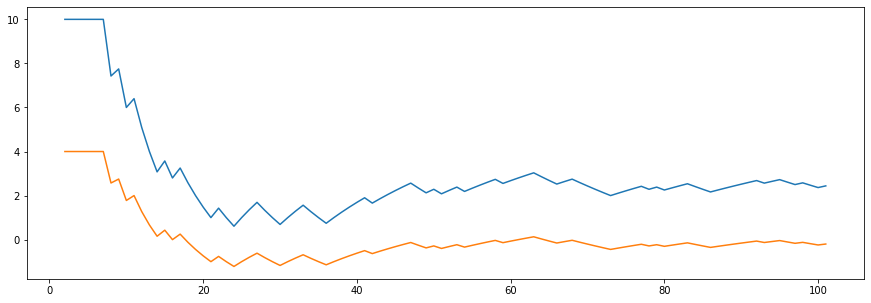

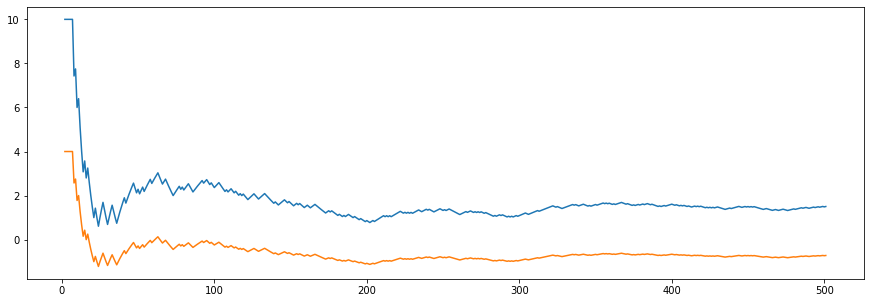

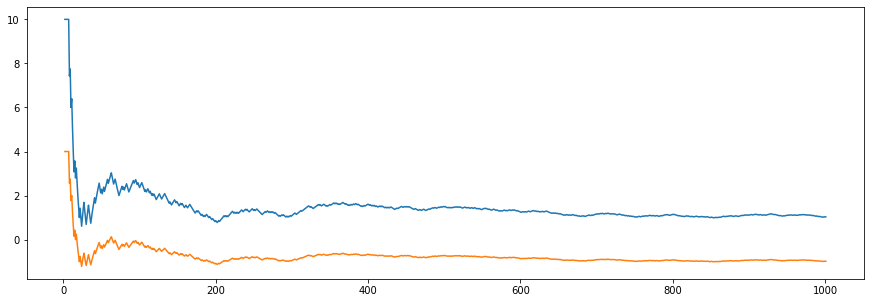

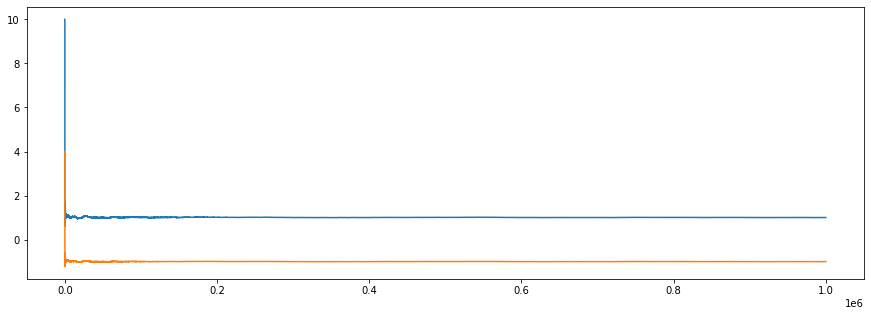

In [112]:
for i in [100, 500, 1000, N]  :
    plt.figure(figsize=(15,5))
    plt.plot(list(df.index[:i]+1), df.Game1EV[:i])
    plt.plot(list(df.index[:i]+1), df.Game2EV[:i])
    plt.show()

## Expected Value #2

<font size='2' color='blue'>
GAME 2 : <br>

Fee   :  6              <br>
Heads :  Win  10        <br>
Tails :  Lose 0         <br>

Calculate Expected Value     
</font>

In [40]:
(.5 * 10) + (.5 * 0) - 6

-1.0

In [69]:
Game2Fee = 6
Game2Heads = 10
Game2Tails = 0
N = 1000000   

X = np.random.choice(['Heads', 'Tails'], N)
df2 = pd.DataFrame(X, columns=['Random_Variable'])
df2['Game2'] = np.where(df2['Random_Variable']=='Heads', Game2Heads, Game2Tails)
df2['Game2Fee'] = Game2Fee
df2['Game2NetGain'] = df2.Game2 - df2.Game2Fee
df2['Game2CumGain'] = np.cumsum(df2.Game2NetGain)
df2['Game2Expected_Value'] = df2.Game2CumGain/(df2.index+1)

In [94]:
df2.head()

,Random_Variable,Game2,Game2Fee,Game2NetGain,Game2CumGain,Game2Expected_Value
0,Heads,10,6,4,4,4.000000
1,Heads,10,6,4,8,4.000000
2,Tails,0,6,-6,2,0.666667
3,Heads,10,6,4,6,1.500000
4,Tails,0,6,-6,0,0.000000


In [70]:
sum(df2.Game2NetGain)/1000000

-0.99354

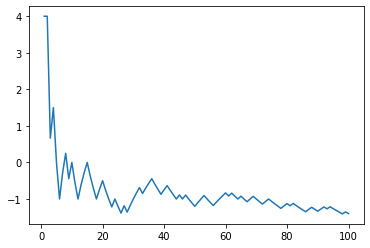

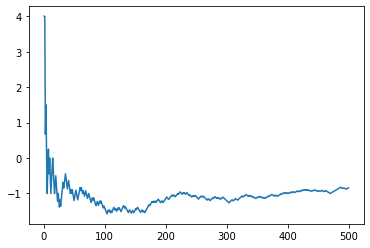

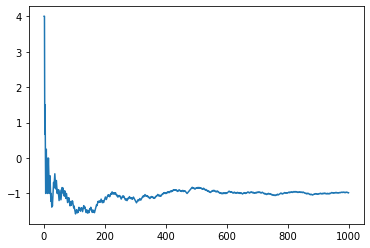

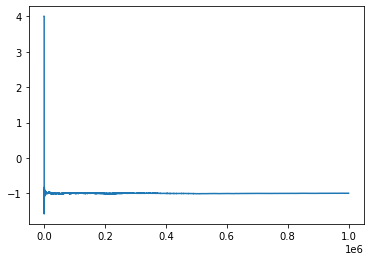

In [71]:
for i in [100, 500, 1000, N]  :
    plt.plot(list(df2.index[:i]+1), df2.Game2Expected_Value[:i])
    plt.show()

In [18]:
df2.tail(1)

,Random_Variable,Game2,Game2Fee,Game2NetGain,Game2CumGain,Game2Expected_Value
999999,Tails,0,6,-6,-1002020,-1.00202


## Expected Value  #1

In [200]:
# Expected Value Calculation 
# multiply each value of the random variable by its probability and add the products. 


In [326]:
# consider numbers 1 to 10

prob = 1/10
rv   = np.array([1,2,3,4,5,6,7,8,9,10])
print(rv*prob)
print(sum(rv*prob))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
5.500000000000001


In [295]:
prob = 1/6
rv   = np.array([1,2,3,4,5,6])
print(rv*prob)
print(sum(rv*prob))

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]
3.5


In [298]:
# consider a coin

prob = .5
rv   = np.array([1,0])
print(rv*prob)
print(sum(rv*prob))

[0.5 0. ]
0.5


<font size='2' color='blue'>
GAME 1 : <br>

Fee   :  0              <br>
Heads :  Win  10        <br>
Tails :  Lose 8         <br>

Calculate Expected Value     
</font>

In [334]:
# Expected Value :
((.5 * 10) + (.5 * -8)) - 0

1.0

In [91]:
# Let us prove through an experiment that the Expected Value calculated above is correct :

Game1Fee = 0
Game1Heads = 10
Game1Tails = -8

N = 1000000

X = np.random.choice(['Heads', 'Tails'], N )
df1 = pd.DataFrame(X, columns=['Random_Variable'])
df1['Game1'] = np.where(df1['Random_Variable']=='Heads', Game1Heads, Game1Tails)
df1['Game1Fee'] = Game1Fee
df1['Game1NetGain'] = df1.Game1 - df1.Game1Fee
df1['Game1CumGain'] = np.cumsum(df1.Game1NetGain)
df1['Game1Expected_Value'] = df1.Game1CumGain/(df1.index+1)

In [93]:
df1.head()

,Random_Variable,Game1,Game1Fee,Game1NetGain,Game1CumGain,Game1Expected_Value
0,Tails,-8,0,-8,-8,-8.0
1,Heads,10,0,10,2,1.0
2,Heads,10,0,10,12,4.0
3,Heads,10,0,10,22,5.5
4,Tails,-8,0,-8,14,2.8


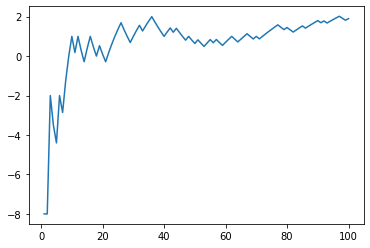

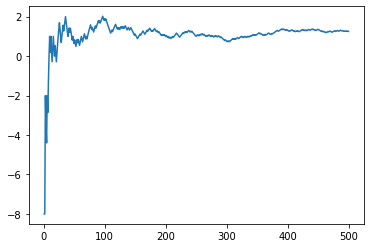

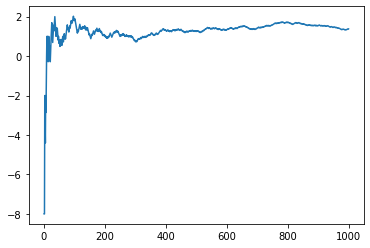

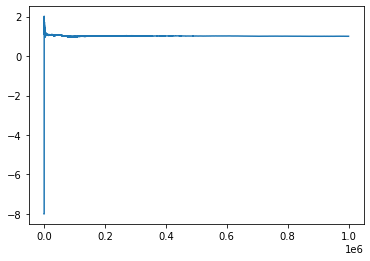

In [369]:
for i in [100, 500, 1000, N]  :
    plt.plot(list(df1.index[:i]+1), df1.Game1Expected_Value[:i])
    plt.show()

## The Law of Large Numbers 

In [38]:
x = np.random.choice(['Heads', 'Tails'], 1000000)
d = C(x)
d

Counter({'Heads': 500213, 'Tails': 499787})

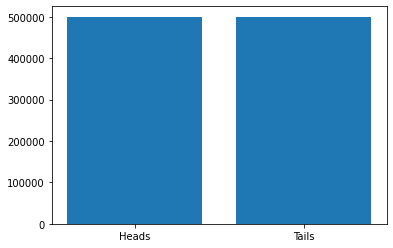

In [33]:
plt.xticks(None)
plt.bar(d.keys(), d.values())
plt.show()

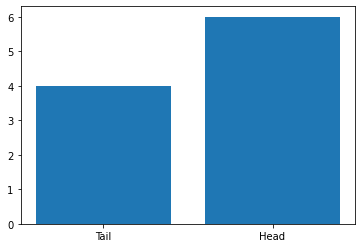

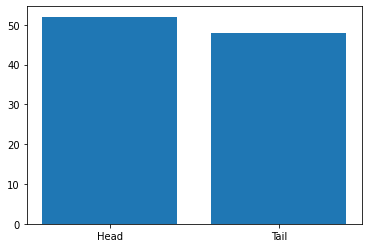

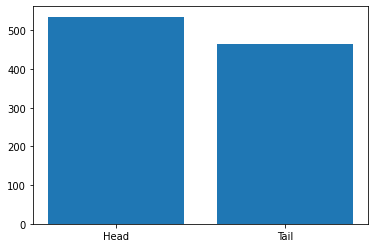

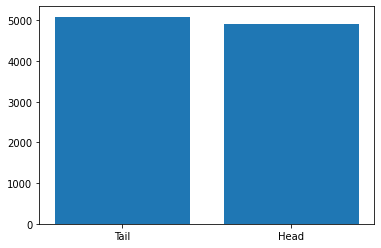

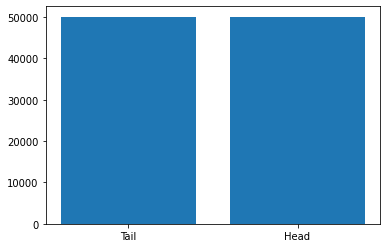

In [34]:
jump = [10,100,1000, 10000, 100000]
for i in jump : 
    x = np.random.choice(['Head','Tail'], i) 
    d = C(x)
    plt.xlim(.5, 0,1, 1.5)
    plt.xticks(None)
    plt.bar(d.keys(), d.values())
    plt.show()
    

In [35]:
df = pd.DataFrame(x,columns=['HT'])
df['HeadCount'] = np.where(df.HT == 'Head', 1, 0 )
df['TailCount'] = np.where(df.HT == 'Tail', 1, 0 )
df['HeadRatio'] = np.cumsum(df.HeadCount)/(df.index+1)
df['TailRatio'] = np.cumsum(df.TailCount)/(df.index+1)

In [36]:
df.head()

,HT,HeadCount,TailCount,HeadRatio,TailRatio
0,Head,1,0,1.000000,0.000000
1,Tail,0,1,0.500000,0.500000
2,Head,1,0,0.666667,0.333333
3,Head,1,0,0.750000,0.250000
4,Tail,0,1,0.600000,0.400000


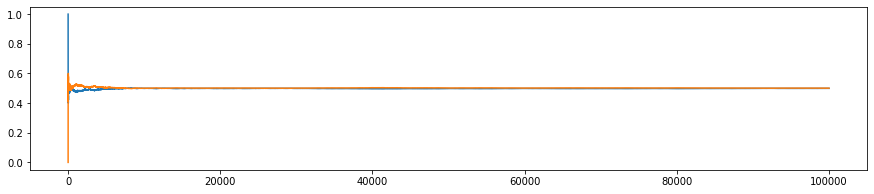

In [37]:
plt.figure(figsize=(15, 3))
plt.plot(df.index+1, df.HeadRatio)
plt.plot(df.index+1, df.TailRatio)
plt.show()

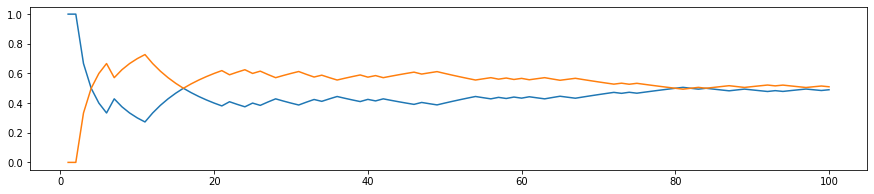

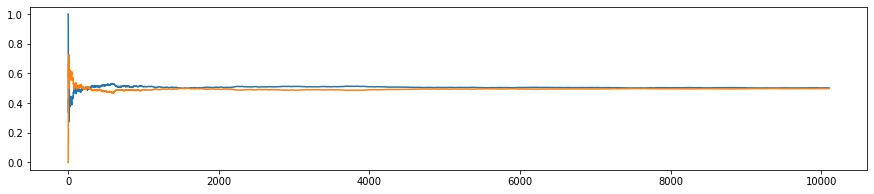

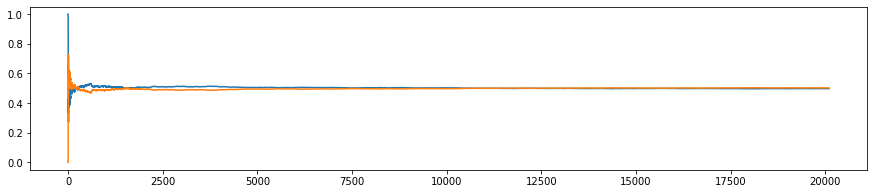

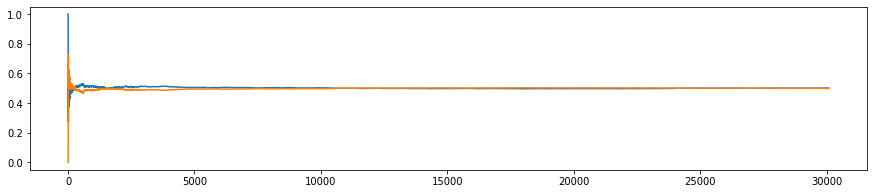

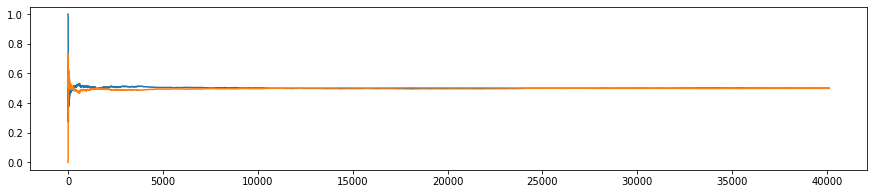

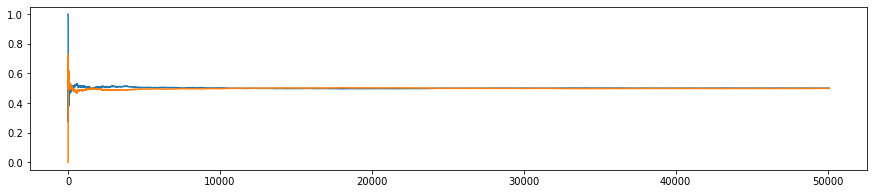

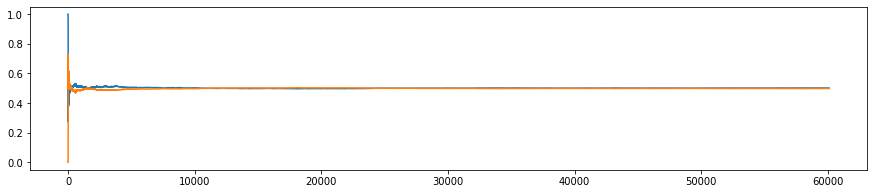

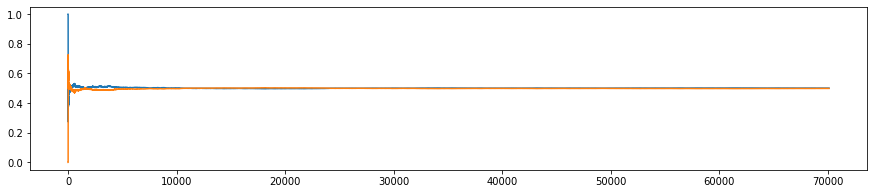

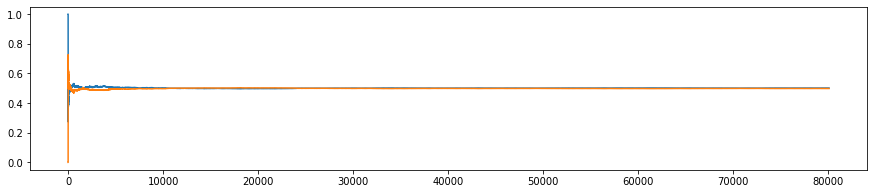

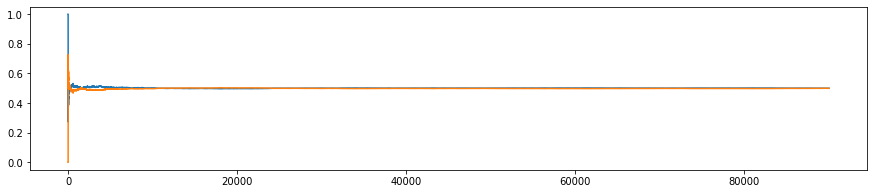

In [186]:
for i in range(100, len(df), 10000) :
    plt.figure(figsize=(15, 3))
    plt.plot((df.index+1)[:i], df.HeadRatio[:i])
    plt.plot((df.index+1)[:i], df.TailRatio[:i])
    plt.show()

In [188]:
df.tail(5)

,HT,HeadCount,TailCount,HeadRatio,TailRatio
99995,Tail,0,1,0.499930,0.500070
99996,Head,1,0,0.499935,0.500065
99997,Tail,0,1,0.499930,0.500070
99998,Tail,0,1,0.499925,0.500075
99999,Head,1,0,0.499930,0.500070
